# Projet Python

# 1] Introduction

Ce projet à pour but d'étudier le "Online News Popularity Data Set", un data set qui nous a été fournis par "UCI Machine Learning Repository". Cette base de données référencie l'ensemble des articles publiés par un un site d'actualité pour une période de 2 ans. Le site web en question n'est autre que "Marshable" fondé par Pete Cashmore en juillet 2005. 

À terme notre objectif est de mettre en place des modèles de machine learning afin de prédire la popularité (nombre de partage) d'un article donné.

# 2] Exploration des données

Selon les informations fournies par l'UCI Machine Learning Repository, notre data set est constitué de 61 colonnes dont 2 colonnes non prédictive "url" et "timedelta" qui représente respectivement l'url de l'article et le nombre de jours entre la publication de l'article et l'acquisition du data set par l'UCI, 58 autres colonnes qui quant à elles sont prédictives, et pour finir une colonne cible "share" qui représente le nombre de partage de l'article. 

Comme on peut le voir ci-dessous notre dataset est bien constitué de 61 colonnes et 39 644 articles (lignes)

In [ ]:
import pandas as pd

data_set= pd.read_csv("data/OnlineNewsPopularity.csv",sep=";")
data_set.shape

(39644, 61)

De plus toujours selon les informations fournies par l'UCI notre dataset est uniquement composé de nombre d'integers et de floats, ce qui nous laisse penser qu'il a d'ores et déja subit une normalisation et un nettoyage, ajouté à cela que l'UCI mentionne qu'il ne contient aucun NA. Si nous décidons d'afficher la liste des colonnes qui composent notre data set, nous remarquons vite que les colonnes de type character on été splité sous forme de matrice. Comme par exemple ce qui semblait être la colonne weekday, contenant sûrement le jour de publication de l'article, a été transformé en 7 colonnes weekday_is_monday, weekday_is_tuesday ... avec des valeurs égales à 0 si non et 1 si oui.

In [ ]:
data_set.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [ ]:
# Aperçu de la distribution des données
data_set.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [ ]:
data_set['weekday_is_monday'].unique()

array([1., 0.])

L'étape de nettoyage du data set ayant déja été faite, nous allons passer cette étape pour l'instant. Nous reviendrons dessus si nécessaire, pour retravailler un peu plus nos données afin d'améliorer les performances de nos futurs modèles (si nécessaire). La seule action que nous allons effectuer est de supprimer les deux colonnes non prédictives que sont : url et timedelta. 

#### Mais avant ça essayons de découvrir de quelle année date notre dataset, grâce au time delta, sachant que la date d'acquisition est le 8 janvier, 2015.

In [ ]:
# Récupérer le max et min timedelta
min_timedelta = data_set['timedelta'].min()
print(min_timedelta)

max_timedelta = data_set['timedelta'].max()
print(max_timedelta)

8.0
731.0


In [ ]:
import datetime as dt
from datetime import timedelta
acquisition_date = dt.datetime.strptime('2015-01-08', '%Y-%m-%d')

In [ ]:
# On calcul la date de l'article le plus récent et le plus ancien du data set
start_date = (acquisition_date - timedelta(days=max_timedelta)).strftime("%d-%m-%Y")
end_date = (acquisition_date - timedelta(days=min_timedelta)).strftime("%d-%m-%Y")

In [ ]:
print( f"Le data set contient {data_set.shape[0]} articles datant du {start_date} juqu'au {end_date}" )

Le data set contient 39644 articles datant du 07-01-2013 juqu'au 31-12-2014


D'après nos calculs le data set contient 39 644 articles provenant du site Marshable et datant du 7 janvier 2013 au 31 décembre 2014.

Maintenant que nous en savons un peu plus sur nos données, nous allons essayer de mieux comprendre chacune de nos 58 colonnes (url et timedelta exclu), et essayer de les regrouper en groupes si possible.

Tout d'abord nous pouvons décerner un premier groupe, correspondant à des statistiques d'une étude NLP sur l'article : 
    
    - n_tokens_title : nombre de mots dans le titre de l'article
    - n_tokens_content : nombre de mots dans l'article
    - n_unique_tokens : taille du dictionnaire utilisée dans l'article
    - n_non_stop_words : nombre de mots non communs ( != pronoms, conjonctions... )
    - n_non_stop_unique_tokens : taille du dictionnaire de non stop words utilisé dans l'article
    - average_token_length : taille moyennes des mots dans l'article
    - [ LDA_00, LDA_01, LDA_02, LDA_03, LDA_04 ] : probabilité que l'article appartienne à un des Sujets donnés résultant d'un LDA (méthode de clusterisation).
    - global_subjectivity : subjectivité de l'article (compris en 0 et 1, 1 étant 100% subjectif)
    - global_sentiment_polarity : polarité de l'article (positif ou negatif entre 1 et -1, 0 étant neutre) 
    - global_rate_positive_words : taux de mots positif dans l'article (compris entre 0 et 1, 1 étant 100%)
    - global_rate_negative_words : taux de mots négatif dans l'article (compris entre 0 et 1, 1 étant 100%)
    - rate_positive_words : taux de mots positif dans l'article parmis les mots non neutre (compris entre 0 et 1, 1 étant 100%)
    - rate_negative_words : taux de mots négatif dans l'article parmis les mots non neutre (compris entre 0 et 1, 1 étant 100%)
    - avg_positive_polarity : polarité moyenne des mots positifs
    - min_positive_polarity : polarité minimal des mots positifs
    - max_positive_polarity : polarité maximal des mots positifs
    - avg_negative_polarity : polarité moyenne des mots négatifs
    - min_negative_polarity : polarité minimal des mots négatifs
    - max_negative_polarity : polarité maximal des mots négatifs
    - title_subjectivity : subjectivité du titre (compris en 0 et 1, 1 étant 100% subjectif)
    - title_sentiment_polarity : polarité du titre (positif ou négatif entre 1 et -1, 0 étant neutre) 
    - abs_title_subjectivity : subjectivité du titre absolue
    - abs_title_sentiment_polarity : polarité asbolue du titre
    
    
Nous avons ensuite les colonnes qui sont selon nous plus liées aux analytics web :

    - num_hrefs : nombre de liens présents dans l'article
    - num_self_hrefs : nombre de liens vers d'autre artciles Marshable présents dans l'article
    - num_imgs : nombre d'images dans l'article
    - num_videos : nombre de vidéos dans l'atricle
    - num_keywords : nombre de keywords dans la balise meta
    - [ data_channel_is_lifestyle, data_channel_is_entertainment, data_channel_is_bus, data_channel_is_socmed, data_channel_is_tech, data_channel_is_world ]  : type / catégorie d'article
    - kw_min_min : minimum de partage pour le pire keywords
    - kw_max_min : maximum de partage pour le pire keywords
    - kw_avg_min : moyenne de partage pour le pire keywords
    - kw_min_max : minimum de partage pour le meilleur keywords
    - kw_max_max : maximum de partage pour le meilleur keywords
    - kw_avg_max : moyenne de partage pour le meilleur keywords
    - kw_min_avg : minimum de partage pour un keywords moyen
    - kw_max_avg : maximum de partage pour un keywords moyen
    - kw_avg_avg : moyenne de partage pour un keywords moyen
    - self_reference_min_shares: partage minimal pour les articles référencés par Mashable 
    - self_reference_max_shares: partage maximal pour les articles référencés par Mashable 
    - self_reference_avg_shares: partage moyen pour les articles référencés par Mashable 
    - [ weekday_is_monday, weekday_is_tuesday, weekday_is_wednesday, weekday_is_thursday, weekday_is_friday, weekday_is_saturday, weekday_is_sunday ] : jour de publication de l'article 
    - s_weekend: l'article a-t'il été publié un weekend
    
et enfin pour finir notre analyse nous avons la colonne cible qui est share : représentant le nombre de partage de l'article (popularité)

##### Étude des colonnes liées au sentiment analysis afin d'en avoir une meilleure compréhension ( travail qui nous a permis de rédiger l'analyse ci-dessus )

In [ ]:
#étude de subjectivité
print(f"min subjectivity {data_set['global_subjectivity'].min()}")
print(f"max subjectivity {data_set['global_subjectivity'].max()}")

data_set.sort_values(by='global_subjectivity', ascending=False)

min subjectivity 0.0
max subjectivity 1.0


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
30706,http://mashable.com/2014/08/12/james-bond-ian-...,149.0,9.0,57.0,0.789474,1.0,0.941176,2.0,2.0,0.0,...,0.25,0.25,0.000000,0.0,0.000000,0.633333,5.551115e-17,0.133333,5.551115e-17,567
13035,http://mashable.com/2013/09/16/college-soccer-...,479.0,9.0,97.0,0.651163,1.0,0.636364,4.0,3.0,10.0,...,0.50,0.50,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.500000,0.000000e+00,784
1220,http://mashable.com/2013/01/28/sag-awards-les-...,710.0,10.0,308.0,0.616667,1.0,0.714286,11.0,3.0,1.0,...,0.20,0.60,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.500000,0.000000e+00,804
19570,http://mashable.com/2014/01/29/nsa-privacy-off...,344.0,11.0,165.0,0.717791,1.0,0.868132,3.0,2.0,0.0,...,0.50,0.50,-0.333333,-0.5,-0.166667,1.000000,5.000000e-01,0.500000,5.000000e-01,3600
24155,http://mashable.com/2014/04/25/facebook-google...,258.0,11.0,32.0,0.843750,1.0,0.850000,1.0,1.0,1.0,...,0.50,0.50,-0.800000,-0.8,-0.800000,0.100000,2.000000e-01,0.400000,2.000000e-01,1500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,http://mashable.com/2013/02/01/2012-internet-o...,706.0,12.0,0.0,0.000000,0.0,0.000000,0.0,0.0,12.0,...,0.00,0.00,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.500000,0.000000e+00,1100
35469,http://mashable.com/2014/10/24/queen-elizabeth...,74.0,8.0,0.0,0.000000,0.0,0.000000,0.0,0.0,12.0,...,0.00,0.00,0.000000,0.0,0.000000,0.677273,4.681818e-01,0.177273,4.681818e-01,1000
37454,http://mashable.com/2014/11/21/man-discovers-t...,46.0,12.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.00,0.00,0.000000,0.0,0.000000,0.227273,6.818182e-02,0.272727,6.818182e-02,23000
32402,http://mashable.com/2014/09/09/get-ios-8/,121.0,10.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.00,0.00,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.500000,0.000000e+00,1500


In [ ]:
#étude du sentiment polarity
print(f"min sentiment polarity {data_set['global_sentiment_polarity'].min()}")
print(f"max sentiment polarity {data_set['global_sentiment_polarity'].max()}")

min sentiment polarity -0.39375
max sentiment polarity 0.727840909091


On peut voir que pour le premier article le taux de mots positifs est supérieur au taux de mots négatifs, et que la polarité globale de l'article est > 0, ce qui signifie que l'article est plutôt positif, même si le taux est assez faible. Ces résultats semblent logiques et nous permettent de mieux appréhender notre dataset.

In [ ]:
#étude du global rate positive et negative words
print(f"min global_rate_positive_words {data_set['global_rate_positive_words'].min()}")
print(f"max global_rate_positive_words {data_set['global_rate_positive_words'].max()}\n")

print(f"min global_rate_negative_words {data_set['global_rate_negative_words'].min()}")
print(f"max global_rate_negative_words {data_set['global_rate_negative_words'].max()}\n")

print(f"première article global_rate_positive_words {data_set['global_rate_positive_words'].iloc[0]}")
print(f"première article global_rate_negative_words {data_set['global_rate_negative_words'].iloc[0]}\n")

print(f"première article polarité {data_set['global_sentiment_polarity'].iloc[0]}")


min global_rate_positive_words 0.0
max global_rate_positive_words 0.155487804878

min global_rate_negative_words 0.0
max global_rate_negative_words 0.184931506849

première article global_rate_positive_words 0.045662100456600005
première article global_rate_negative_words 0.013698630137

première article polarité 0.09256198347110002


Ici nous avons voulu comprendre la différence entre les colonnes rate_positive_words/rate_negative_words et global_rate_positive_words/global_rate_negative_words. Grâce à notre travail, et aux informations données par l'UCI, nous avons compris que rate_positive_words/rate_negative_words correspond au taux de mots positifs et négatifs parmis les mots non neutre, par conséquent la somme de ces 2 colonnes doit être égale à 1 car il s'agit de 100% des mots non neutre. Contrairement aux colonnes global_rate_positive_words/global_rate_negative_words qui correspondent au taux de mots positifs et négatifs parmi l'ensemble des mots de l'article.

In [ ]:
#étude du rate positive et negative words
print(f"min rate_positive_words {data_set['rate_positive_words'].min()}")
print(f"max rate_positive_words {data_set['rate_positive_words'].max()}\n")

print(f"min rate_negative_words {data_set['rate_negative_words'].min()}")
print(f"max rate_negative_words {data_set['rate_negative_words'].max()}\n")

print(f"première article rate_positive_words {data_set['rate_positive_words'].iloc[0]}")
print(f"première article rate_negative_words {data_set['rate_negative_words'].iloc[0]}\n")

print(f"première article rate_positive_words + rate_negative_words {data_set['rate_positive_words'].iloc[0] + data_set['rate_negative_words'].iloc[0]}")


min rate_positive_words 0.0
max rate_positive_words 1.0

min rate_negative_words 0.0
max rate_negative_words 1.0

première article rate_positive_words 0.769230769231
première article rate_negative_words 0.23076923076900002

première article rate_positive_words + rate_negative_words 1.0


# 3] Nettoyage des données

Bien que les données semblent avoir d'ores et déja subi un traitement de nettoyage, en vérifiant la répartition des données on peut voir qu'il y a encore des données qui semblent trompeuses, erronés ou encore des valeurs abérrantes. Comme par exemple, le nombre maximum de partage qui est de 38000 alors que le 3ème quartile n'est qu'à 4200, ou encore certains articles dont le nombre de token est de 0.

### A) supprimer les colonnes inutiles

In [ ]:
# Suppression de la colonne time delta
data_set.drop(columns=['timedelta'], inplace=True)

### B) Supprimer les lignes avec des valeurs à 0 qui semblent trompeuses

In [ ]:
# Vérifions qu'il n'y ai pas d'article vide
data_set[data_set['n_tokens_content']==0]

,url,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
893,http://mashable.com/2013/01/23/actual-facebook...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.550000,-0.500000,0.050000,0.500000,2500
917,http://mashable.com/2013/01/23/fitness-gadget-...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.500000,0.000000,1700
1062,http://mashable.com/2013/01/25/data-vs-nature-...,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.500000,0.000000,4500
1121,http://mashable.com/2013/01/26/infographics-ma...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.066667,0.033333,0.433333,0.033333,6800
1312,http://mashable.com/2013/01/29/social-tv-chart...,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.283333,0.266667,0.216667,0.266667,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39598,http://mashable.com/2014/12/26/holiday-decorat...,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.333333,0.250000,0.166667,0.250000,6100
39601,http://mashable.com/2014/12/26/minority-author...,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.625000,0.400000,0.125000,0.400000,2300
39613,http://mashable.com/2014/12/26/the-interview-b...,12.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.500000,0.000000,1600
39615,http://mashable.com/2014/12/26/toothpaste-fluo...,11.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.454545,0.136364,0.045455,0.136364,5700


In [ ]:
# Supprimer les 1181 lignes qui semble contenir des erreurs (article vide) 
data_set = data_set[data_set['n_tokens_content']!=0]

In [ ]:
# Réindexer le dataset
data_set = data_set.reset_index(drop=True)

# 4] Discrétisation de la target

L'objectif de ce projet est de déterminer les facteurs qui décide de la popularité ou non d'un article. Et à termes de pouvoir mettre en place des modèles de Machine learning afin de pouvoir prédire la popularité d'un article. Selon cette description, il s'agit d'un problème de classification, un article peut etre taggué de populaire, non populaire, ou encore neutre. C'est à nous de choisir le nombre de niveaux que nous voulons donner à notre valeur cible, mais aussi de déterminer les seuils (nombre de partage) qui permettent de tagguer un article comme populaire ou non.

Dans notre cas nous avons choisi de donner 5 niveaux à notre colonne cible :

- Non populaire : < 708 partages (10% des articles)
- Peu populaire : 708 <= & < 1100  partages (25% des articles)
- Neutre :  1100 <= & < 2000  partages (30% des articles)
- Populaire : 2000 <= & < 6100  partages (25% des articles)
- Très populaire : >= 6100 partages (10% des articles)


D'après nos tests plus nous augmentions le nombre de niveaux, plus l'accuracy baissait, les meilleurs résultats ont été obtenue avec 2 niveaux en utilisant la médiane comme référence. Seulement cette finesse ne nous convenait pas car selon nous un article n'est pas populaire ou non, il peut être dans l'entre-deux c'est pourquoi nous avons choisi 5 niveaux.
    
Nous avons donc crée une nouvelle colonne "popularity" qui va devenir notre target.

In [ ]:
data_set['shares'].describe()

count     38463.000000
mean       3355.360398
std       11585.968776
min           1.000000
25%         945.000000
50%        1400.000000
75%        2700.000000
max      843300.000000
Name: shares, dtype: float64

In [ ]:
quantils = data_set.shares.quantile([0.10, 0.35, 0.65, 0.90])
print(quantils)

# On transforme quantils en list pour simplifier la suite
quantils = quantils.tolist()

0.10     708.0
0.35    1100.0
0.65    2000.0
0.90    6100.0
Name: shares, dtype: float64


In [ ]:
# Valeur de notre target
labels = ['non populaire', 'peu populaire', 'neutre', 'populaire', 'très populaire'] 

In [ ]:
# Remplacer les valeurs de shares par les niveaux de classification
for i, quantil in enumerate(quantils):
    print(i, ': ', quantil, 'Done')
    data_set.loc[data_set.shares >= quantil,'popularity'] = labels[i+1]
    if (i == 0):
        data_set.loc[data_set.shares < quantil,'popularity'] = labels[i]

0 :  708.0 Done
1 :  1100.0 Done
2 :  2000.0 Done
3 :  6100.0 Done


In [ ]:
# Sanity check 
data_set.popularity.unique()

for i, quantil in enumerate(quantils):
    if (i == 0):
        print(i, ': < ', quantil, '; new value should be : ', labels[i])
        print(data_set.loc[data_set.shares < quantil,'popularity'].unique())
    
    if (i != len(quantils)-1): 
        print(i, ': >= ', quantil, ' and < ', quantils[i+1],'; new value should be : ', labels[i+1])
        print(data_set.loc[(data_set.shares >= quantil) & (data_set.shares < quantils[i+1]),'popularity'].unique())
    else:
        print(i, ': >= ', quantil, '; new value should be : ', labels[i+1])
        print(data_set.loc[(data_set.shares >= quantil),'popularity'].unique())

0 : <  708.0 ; new value should be :  non populaire
['non populaire']
0 : >=  708.0  and <  1100.0 ; new value should be :  peu populaire
['peu populaire']
1 : >=  1100.0  and <  2000.0 ; new value should be :  neutre
['neutre']
2 : >=  2000.0  and <  6100.0 ; new value should be :  populaire
['populaire']
3 : >=  6100.0 ; new value should be :  très populaire
['très populaire']


# 5] Visualisation des données

## A) Préparation des données pour Data visualisation

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data_vis = data_set.copy()

### 1) Fusionner les colonnes Weekday en une

In [ ]:
# On récupère les colonnes weekday
publish_day_columns = data_vis.columns.values[list(data_vis.columns).index('weekday_is_monday'):list(data_vis.columns).index('weekday_is_sunday')+1]

# On récupère pour chaque article la valeur des colonnes weekday
merge_days = data_vis[publish_day_columns]

days = [day[11:] for day in publish_day_columns] 

_=[]
for r in list(range(merge_days.shape[0])):
    for c in list(range(merge_days.shape[1])):
        if merge_days.iloc[r,c]==1:
            _.append(days[c])

In [ ]:
#sanity check
print(_[1720])
print(data_vis['weekday_is_' + _[1720]].iloc[1720])

tuesday
1.0


In [ ]:
# Mise à jour du data set
data_vis.insert(loc=11, column='publish_day', value=_)
data_vis.drop(columns = publish_day_columns, axis = 1, inplace=True)
data_vis['publish_day']

0           monday
1           monday
2           monday
3           monday
4           monday
           ...    
38458    wednesday
38459    wednesday
38460    wednesday
38461    wednesday
38462    wednesday
Name: publish_day, Length: 38463, dtype: object

### 2) Fusionner les colonnes Channels en une

In [ ]:
# On récupère les colonnes channel
channel_columns = data_vis.columns.values[list(data_vis.columns).index('data_channel_is_lifestyle'):list(data_vis.columns).index('data_channel_is_world')+1]

# On récupère pour chaque article la valeur des colonnes channels
merge_channel = data_vis[channel_columns]

channels =['Lifestyle', 'Entertainment', 'Business', 'Social Media', 'Tech', 'World', 'Others']

# On récupère pour chaque article sa catégorie
_=[]
for r in list(range(merge_channel.shape[0])):
    if (((merge_channel.iloc[r,0])==0) and ((merge_channel.iloc[r,1])==0) and ((merge_channel.iloc[r,2])==0) and ((merge_channel.iloc[r,3])==0) and ((merge_channel.iloc[r,4])==0) and ((merge_channel.iloc[r,5])==0)):
        _.append(channels[len(channels)-1])
    for c in list(range(merge_channel.shape[1])):
        if merge_channel.iloc[r,c]==1:
            _.append(channels[c])

In [ ]:
# Mise à jour du data set
data_vis.insert(loc=12, column='category', value=_)
data_vis.drop(columns = channel_columns, axis = 1, inplace=True)
data_vis['category']

0        Entertainment
1             Business
2             Business
3        Entertainment
4                 Tech
             ...      
38458             Tech
38459     Social Media
38460           Others
38461            World
38462    Entertainment
Name: category, Length: 38463, dtype: object

## B) Data visualisation

## Nombre d'articles publiés en fonction du jour

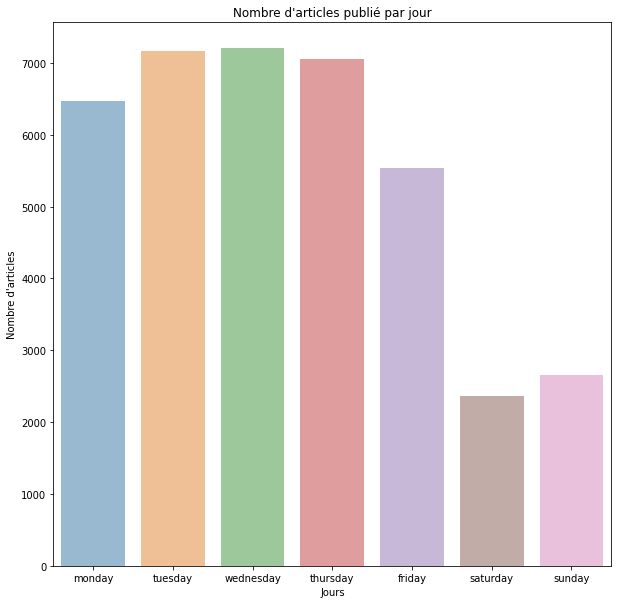

In [ ]:
fig, axes = plt.subplots(figsize=(10,10))
ax = sn.countplot(x='publish_day',data=data_vis,alpha=0.5, ax=axes)
ax = ax.set(xlabel='Jours', ylabel="Nombre d'articles", title="Nombre d'articles publié par jour")

Il semblerait que en semaine il y ait plus d'articles publiés que durant le week-end ce qui semble logique, de plus il y a un pic en milieux de semaine (mercredi)

## Popularité des articles en fonction de leur taille

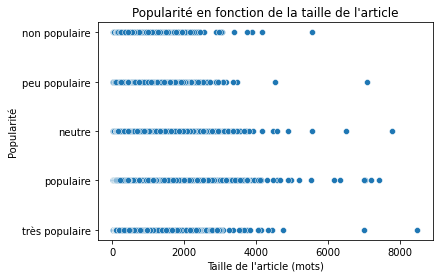

In [ ]:
#n_tokens_content
ax = sn.scatterplot(x='n_tokens_content',y='popularity', data=data_set)
ax = ax.set(xlabel="Taille de l'article (mots)", ylabel="Popularité", title="Popularité en fonction de la taille de l'article")

##### Popularité des articles en fonction de leur taille

Il semblerait que les articles les plus populaires contiennent moins de 3000 mots

## Distribution des articles populaire / neutre / non Populaire en fonction du jour de publication

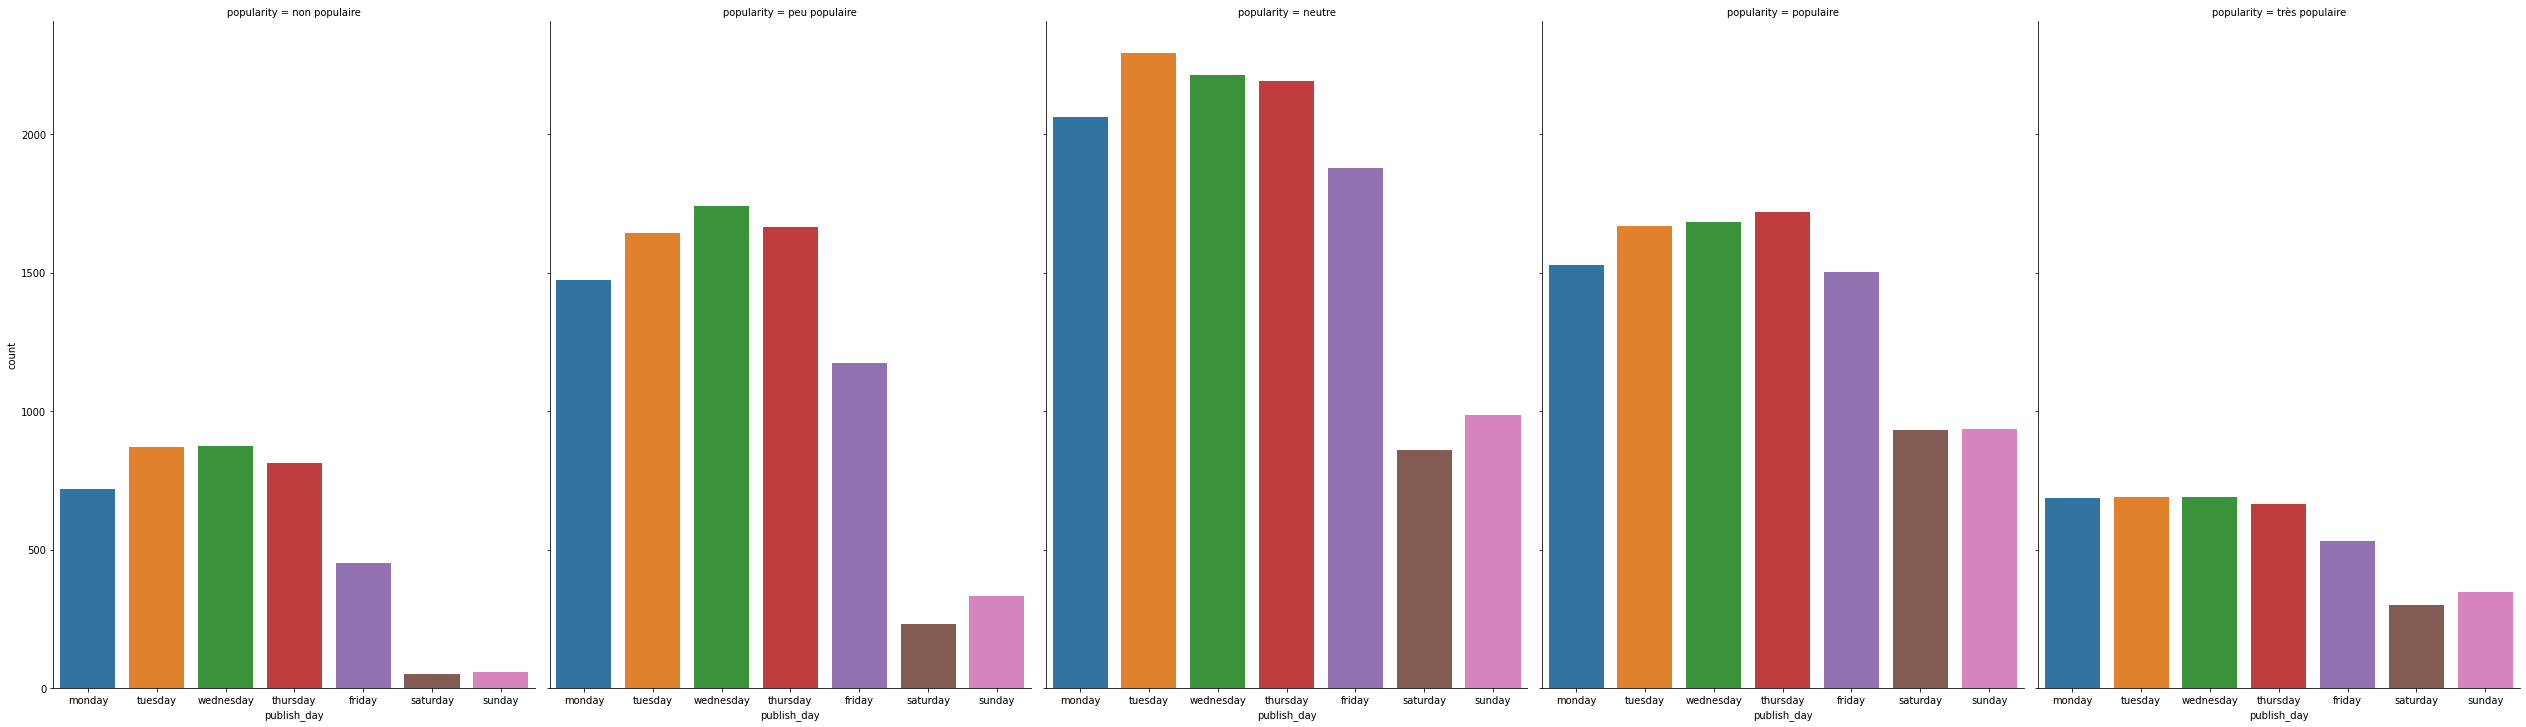

In [ ]:
ax = sn.catplot(x='publish_day', col="popularity", data=data_vis, kind="count", height=10, aspect=.7)

##### Nombre d'articles publiés en fonction de leur popularité et jours de publication

Il semble que les articles les plus populaires soient généralement publiés en début de semaine (lundi au jeudi) ; ce qui n'est pas étonnant car les données ne sont pas pondérées et que nous avons vu que les débuts de semaine le nombre d'articles publiés est plus grand que durant le weekend.

## Distribution des articles en fonction de leur popularité à travers la semaine (pondérée par le nombre d'article publié par jour)

In [ ]:
# Ajouter une colonne pour pondérer le nombre d'articles par jour
def add_pop_rate(group, **kwargs):
    group['rate'] = group.popularity.count() / kwargs['pond'][group[kwargs['col']].iloc[0]]
    return group

# Nombre total d'articles publiés par jours
artcl_day = data_vis.groupby('publish_day').publish_day.count()

# Créer un dataframe temporaire
temp_data = data_vis[['popularity', 'publish_day']].groupby(['publish_day', 'popularity']).apply(add_pop_rate, pond=artcl_day, col="publish_day")

#supprimer les doublons après le groupby
temp_data.drop_duplicates(['popularity', 'publish_day', 'rate'], inplace=True)

In [ ]:
#sanity check
print(temp_data.groupby(['publish_day']).rate.sum())

publish_day
friday       1.0
monday       1.0
saturday     1.0
sunday       1.0
thursday     1.0
tuesday      1.0
wednesday    1.0
Name: rate, dtype: float64


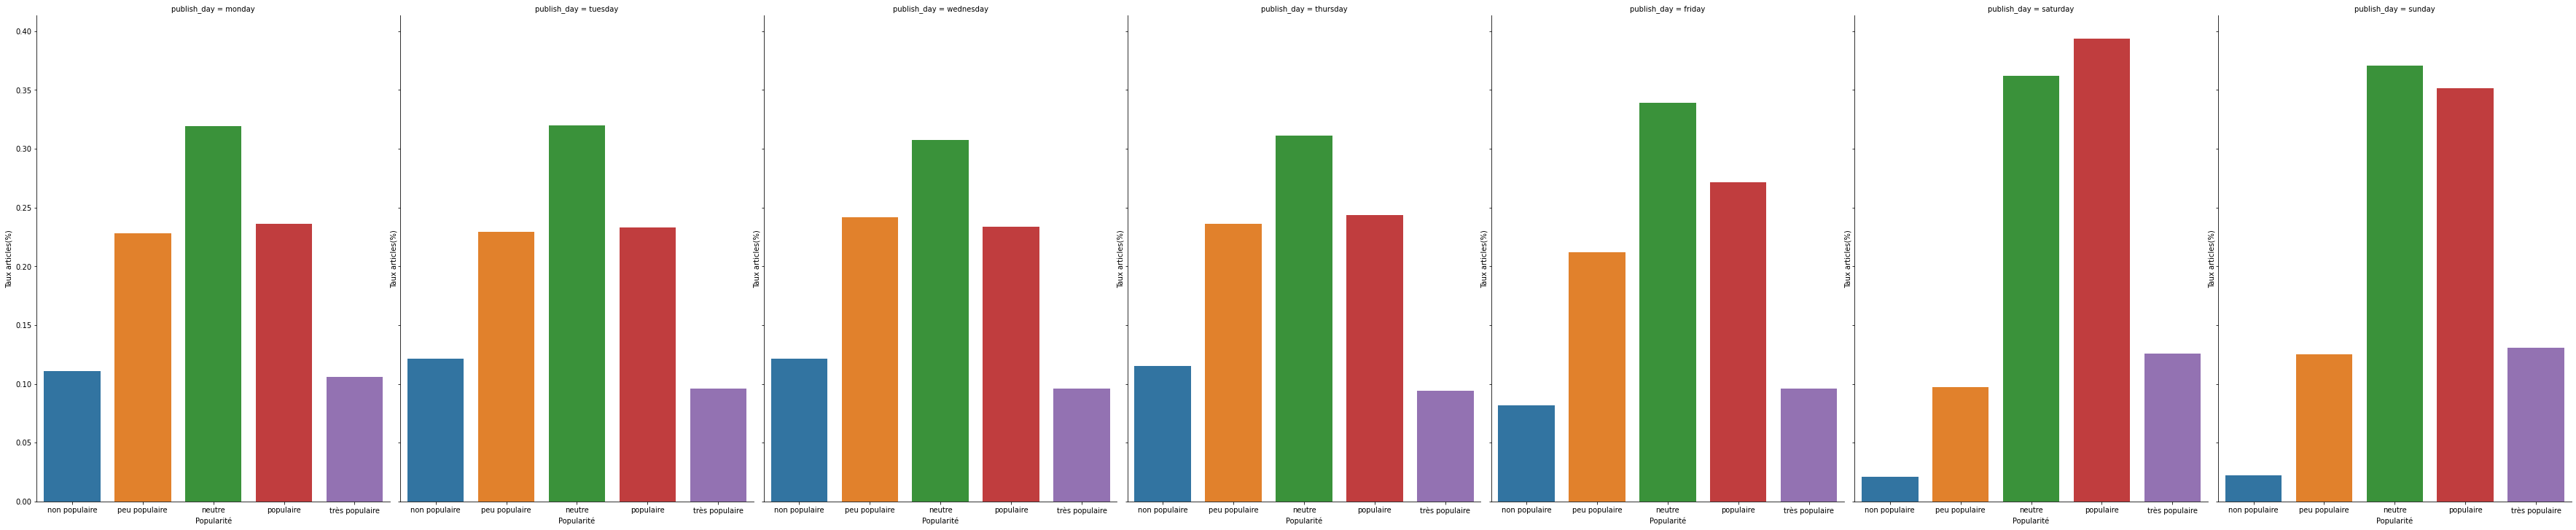

In [ ]:
ax = sn.catplot(x='popularity', y='rate', col="publish_day", data=temp_data, kind="bar", height=10, aspect=.7)
ax = ax.set(xlabel='Popularité', ylabel='Taux articles(%)')

##### Taux d'articles publiés en fonction de leur popularité et du jour de publication (pondéré par le nombre d'articles publiés pour chaque jour)

Une fois pondéré par le nombre d'articles publiés par jour, les résultats sont différents. Il semble que les résultats sont identiques pour les jours de semaines, ils prennent la forme d'une loi normale, contrairement aux jours de week-end où la probabilité que l'article soit populaire est bien plus grande. En effet, près de 40% des articles publiés le samedi sont populaires. Il serait donc préferable de publier un article le week-end.

## Nombre d'articles publiés en fonction de la catégorie

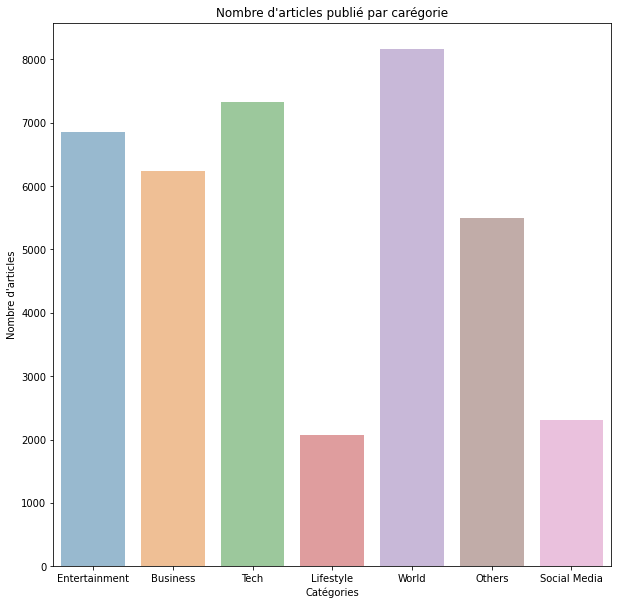

In [ ]:
fig, axes = plt.subplots(figsize=(10,10))
ax = sn.countplot(x='category',data=data_vis,alpha=0.5, ax=axes)
ax = ax.set(xlabel='Catégories', ylabel="Nombre d'articles", title="Nombre d'articles publié par carégorie")

Il semblerait que parmi toutes les catégories, la catégorie world soit celle qui contient le plus d'article publié suivit par Tech et Entertainment

## Distribution des articles en fonction de leur popularité, catégorie (pondérée par le nombre d'articles publiés pour chaque catégorie)

In [ ]:
# Nombre total d'articles publiés par jour
artcl_cat = data_vis.groupby('category').publish_day.count()

# Créer un dataframe temporaire
temp_data = data_vis[['popularity', 'category']].groupby(['category', 'popularity']).apply(add_pop_rate, pond=artcl_cat, col="category")

#supprimer les doublons après le groupby
temp_data.drop_duplicates(['popularity', 'category', 'rate'], inplace=True)

In [ ]:
#sanity check
print(temp_data.groupby(['category']).rate.sum())

category
Business         1.0
Entertainment    1.0
Lifestyle        1.0
Others           1.0
Social Media     1.0
Tech             1.0
World            1.0
Name: rate, dtype: float64


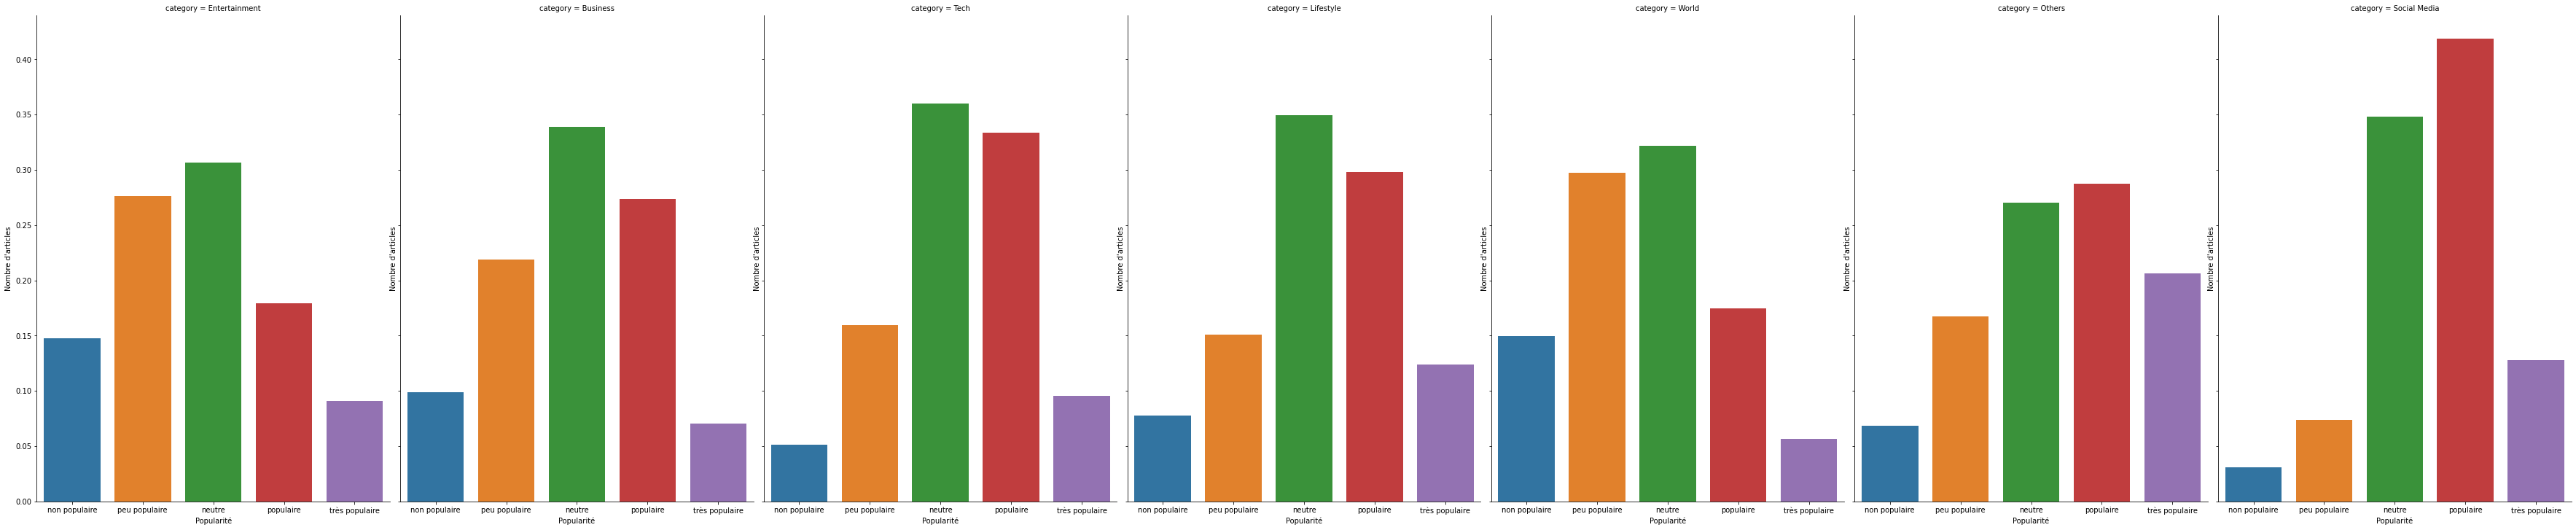

In [ ]:
ax = sn.catplot(x='popularity', y="rate", col="category", data=temp_data, kind="bar", height=10, aspect=.7)
ax = ax.set(xlabel='Popularité', ylabel="Nombre d'articles")

##### Taux d'articles publiés en fonction de leur popularité et de leur catégorie  (pondéré par le nombre d'articles publiés pour chaque catégorie)

Une fois pondérés par le nombre d'articles publiés par catégorie les résultats sont assez simples à comprendre. Il semble que la catégorie avec le taux d'article populaire le plus élevé est la catégorie social media, avec une probabilité de près de 40%, suivit par Tech lifestyle et other. Il serait donc préférable de publier un article dans la catégorie Social Media, Tech ou encore lifestyle.

## Popularité des articles en fonction de la taille du titre

In [ ]:
# limiter les shares à 9000 afin de limité le maximum de l'échelle du graph
temp_data = data_vis[data_vis['shares'] <= 9000]

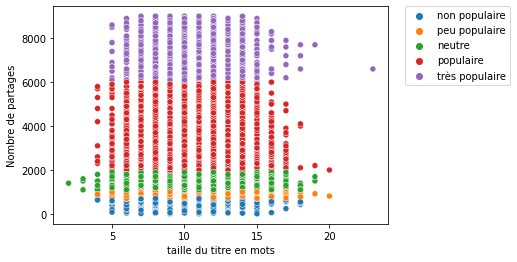

In [ ]:
ax = sn.scatterplot(x='n_tokens_title',y='shares', hue='popularity', data=temp_data)
ax = ax.set(xlabel='taille du titre en mots', ylabel="Nombre de partages")
# légende hors du graph
ax = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

##### Nombre de partage en fonction de la taille du titre

Il semblerait qu'un article avec un titre composé de 5 à 16 mots à plus de chance d'être populaire

## Popularité des articles en fonction du nombre de keywords dans la balise meta

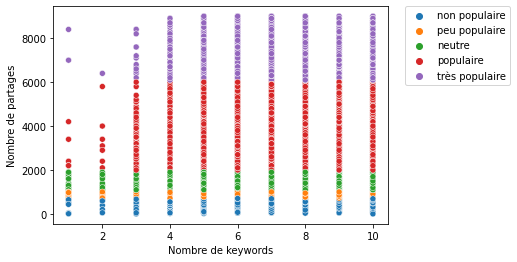

In [ ]:
ax = sn.scatterplot(x='num_keywords',y='shares', hue='popularity', data=temp_data)
ax = ax.set(xlabel='Nombre de keywords', ylabel="Nombre de partages")
ax = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

##### Nombre de partage en fonction du nombre de keywords dans la balise meta

Cette variable semble être très importante pour la popularité de l'article, il semblerait qu'un article avec plus de 3 keywords dans la meta à plus de chance d'être populaire

## Popularité des articles en fonction du nombre de liens dans l'article

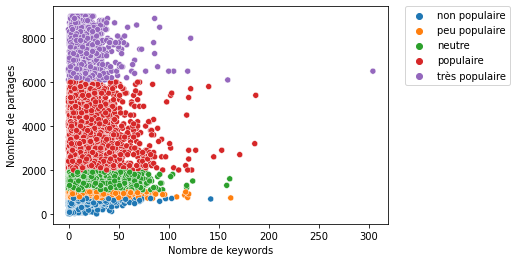

In [ ]:
ax = sn.scatterplot(x='num_hrefs',y='shares', hue='popularity', data=temp_data)
ax = ax.set(xlabel='Nombre de keywords', ylabel="Nombre de partages")
ax = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

##### Nombre de partage en fonction du nombre de liens dans la balise l'article

Il semblerait qu'un article avec moins de 40 liens à plus de chance d'être populaire

## Popularité des articles en fonction du nombre de photos

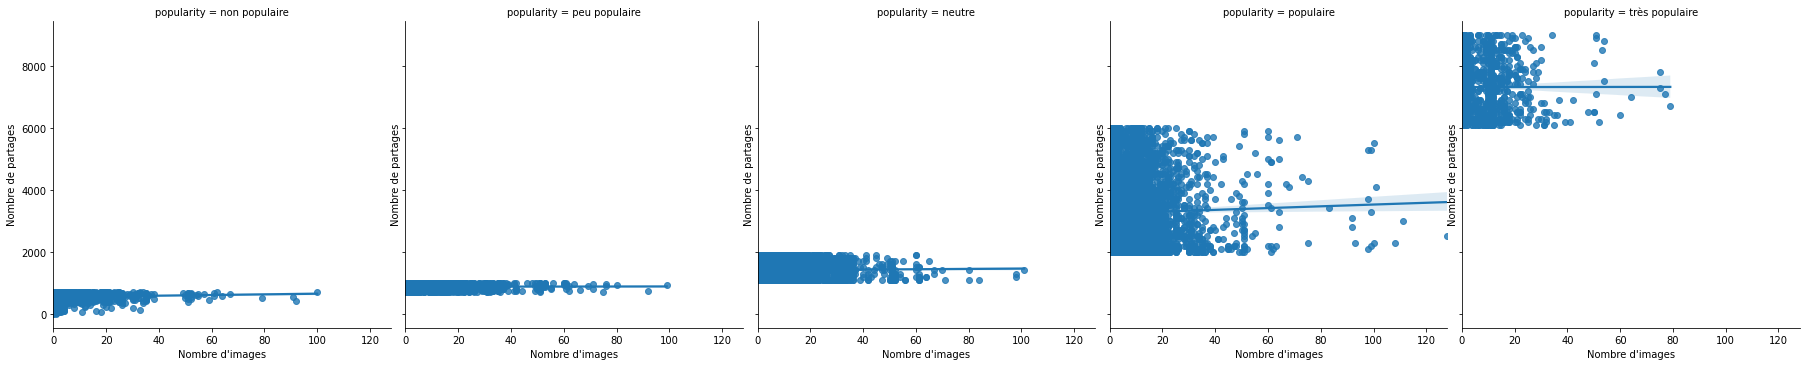

In [ ]:
ax = sn.lmplot(x='num_imgs',y='shares', col='popularity', data=temp_data)
ax = ax.set(xlabel="Nombre d'images", ylabel="Nombre de partages")

##### Nombre de partage en fonction du nombre d'images dans l'article

Il semblerait qu'un article avec moins de 20 photos à plus de chance d'être populaire

## Popularité des articles en fonction du nombre de vidéos

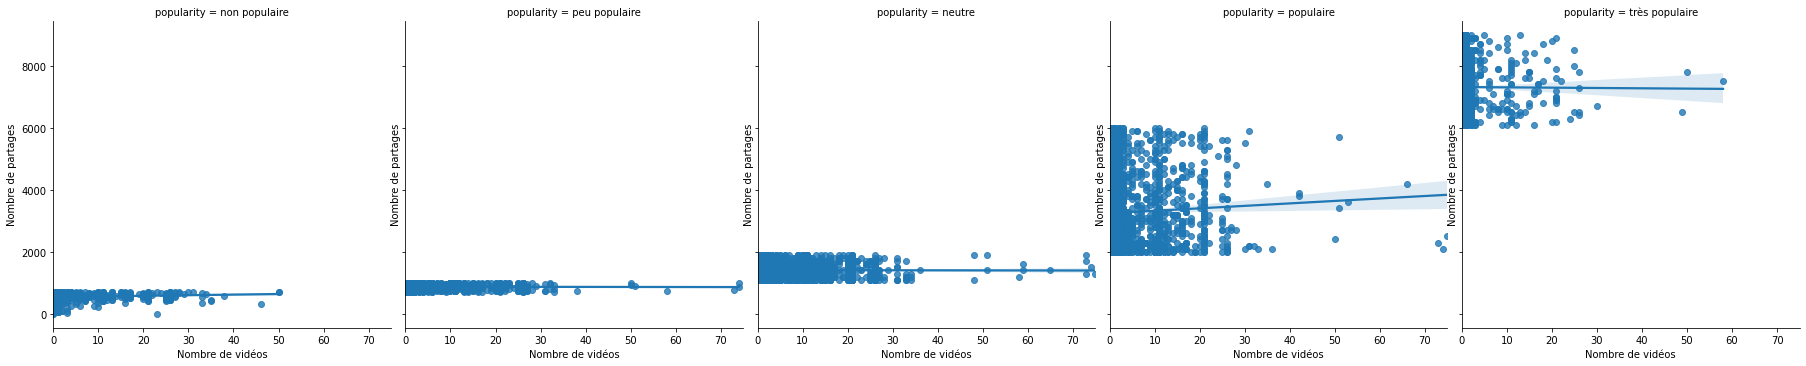

In [ ]:
ax = sn.lmplot(x='num_videos',y='shares', col='popularity', data=temp_data)
ax = ax.set(xlabel="Nombre de vidéos", ylabel="Nombre de partages")

##### Nombre de partage en fonction du nombre de vidéos dans l'article

Il semblerait qu'un article avec moins de 3 vidéos à plus de chance d'être populaire

# 6] Standardisation des données

In [ ]:
# On récupère les colonnes weekdays
publish_day_columns = data_set.columns.values[list(data_set.columns).index('weekday_is_monday'):list(data_set.columns).index('weekday_is_sunday')+1]
publish_day_columns = publish_day_columns.tolist()

In [ ]:
# On récupère les colonnes channel
channel_columns = data_set.columns.values[list(data_set.columns).index('data_channel_is_lifestyle'):list(data_set.columns).index('data_channel_is_world')+1]
channel_columns = channel_columns.tolist()

In [ ]:
# On récupère les colonnes lda
lda_columns = data_set.columns.values[list(data_set.columns).index('LDA_00'):list(data_set.columns).index('LDA_04')+1]
lda_columns = lda_columns.tolist()

In [ ]:
# Liste des colonnes à ne pas standardiser
columns = publish_day_columns + channel_columns + lda_columns + ['popularity', 'shares', 'is_weekend', 'url']
columns

['weekday_is_monday',
 'weekday_is_tuesday',
 'weekday_is_wednesday',
 'weekday_is_thursday',
 'weekday_is_friday',
 'weekday_is_saturday',
 'weekday_is_sunday',
 'data_channel_is_lifestyle',
 'data_channel_is_entertainment',
 'data_channel_is_bus',
 'data_channel_is_socmed',
 'data_channel_is_tech',
 'data_channel_is_world',
 'LDA_00',
 'LDA_01',
 'LDA_02',
 'LDA_03',
 'LDA_04',
 'popularity',
 'shares',
 'is_weekend',
 'url']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data_set = data_set.reset_index(drop=True)

feature_names = data_set.drop(columns=columns).columns

# standardisation des colonnes numériques
data_feature_strd = scaler.fit_transform(data_set.drop(columns=columns).values)

# Création d'un nouveau data_frame
data_set_strd = pd.DataFrame(data_feature_strd, columns=feature_names).join(data_set[columns])

# 7] Modèles

In [ ]:
def plot_accuracy(x, accuracy, title, xlab, ylab):
    plt.figure(figsize=(20,13))
    plt.plot(x, accuracy, 'r-', label=title)
    plt.plot(x, accuracy, 'bx')
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.legend()
    plt.grid()
    plt.title(title)
    plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Split du dataset en X (features) et y (target)
X = data_set_strd.drop(columns=['popularity', 'shares', 'url'])
y = data_set_strd['popularity'].values.tolist()

# Split du data_set en train et test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

## A) Premiers résultat sans tunning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from xgboost.sklearn import XGBClassifier

In [ ]:
classifiers = [
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    XGBClassifier(objective="multi:softprob", random_state=42),
    KNeighborsClassifier()
]

ml_stats = pd.DataFrame(columns=[clf.__class__.__name__  for clf in classifiers])
ml_stats['type'] = ''

In [ ]:
# Score de chacun des modèles
ml_stats = ml_stats.append({'type': 'default'},ignore_index=True)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__  
    print("="*30)
    print(name)
    
    train_predictions = clf.predict(X_test)
    ml_stats[name].iloc[ml_stats.shape[0]-1] = accuracy_score(y_test, train_predictions)
    acc = accuracy_score(y_test, train_predictions)

 
    
print("="*30)

DecisionTreeClassifier
RandomForestClassifier


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:55:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier
KNeighborsClassifier


In [ ]:
ml_stats

,DecisionTreeClassifier,RandomForestClassifier,XGBClassifier,KNeighborsClassifier,type
0,0.285197,0.365792,0.358387,0.311589,default


## B) Decision tree hyper-parametre tuning

In [ ]:
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
dec_tree = tree.DecisionTreeClassifier()

In [ ]:
pipe = Pipeline(steps=[('dec_tree', dec_tree)])

In [ ]:
accuracy= []

min_impurity_decrease = [0.01, 0.005, 0.001, 0.0005, 0.0001]
max_depth = [1, 2, 3, 4, 5, 6, 8, 10,12, 20, 30]
max_features = ['auto','log2',None]
criterion = ['entropy', 'gini']

parameters = []
i=0
for l in min_impurity_decrease:
    for d in max_depth:
        for f in max_features:
            for c in criterion:
                parameters.append({'min_impurity_decrease': l, 'max_depth': d, 'max_features':  f, 'criterion': c})
                tree_bench = DecisionTreeClassifier(criterion=c, max_depth=d,
                                            min_impurity_decrease=l,
                                            max_features = f,
                                            random_state=42)

                tree_bench.fit(X_train, y_train)

                train_predictions = tree_bench.predict(X_test)
                accuracy.append(accuracy_score(y_test, train_predictions))

In [ ]:
print('Best accuracy : ', max(accuracy))

Best accuracy :  0.36287717639643896


In [ ]:
parameters[accuracy.index(max(accuracy))]

{'min_impurity_decrease': 0.001,
 'max_depth': 8,
 'max_features': None,
 'criterion': 'entropy'}

In [ ]:
# Ajout d'une ligne au dataset de statistique 
ml_stats = ml_stats.append({'type': 'optimisé'},ignore_index=True)


tree_opt = DecisionTreeClassifier(criterion='entropy', max_depth=8,
                       min_impurity_decrease=0.001)
tree_opt.fit(X_train, y_train)
train_predictions = tree_opt.predict(X_test)
acc = accuracy_score(y_test, train_predictions)
# Ajout de l'acc au dataframe
ml_stats[tree_opt.__class__.__name__].iloc[ml_stats.shape[0]-1] = acc
print(acc)

0.36287717639643896


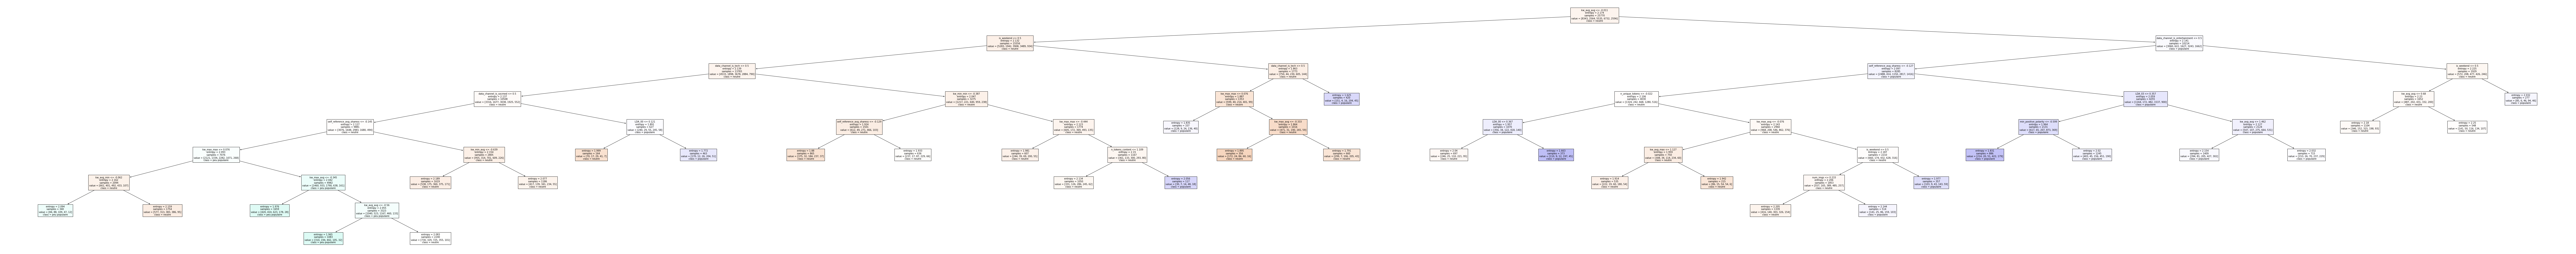

In [ ]:
fig = plt.figure(figsize=(200,20))
tree.plot_tree(tree_opt,  feature_names=X_train.columns, class_names = tree_opt.classes_, fontsize=10, filled=True) 
plt.show()

## C) KNN hyper-parametre tuning

In [ ]:
# defining the model
from sklearn.neighbors import KNeighborsClassifier

k_range = np.arange(1,100)
accuracy = []

for n in k_range:    
    neigh = KNeighborsClassifier(n_neighbors=n, n_jobs=-1)

    neigh.fit(X_train, y_train)

    y_pred = neigh.predict(X_test)
    
    accuracy.append(100*accuracy_score(y_pred, y_test))

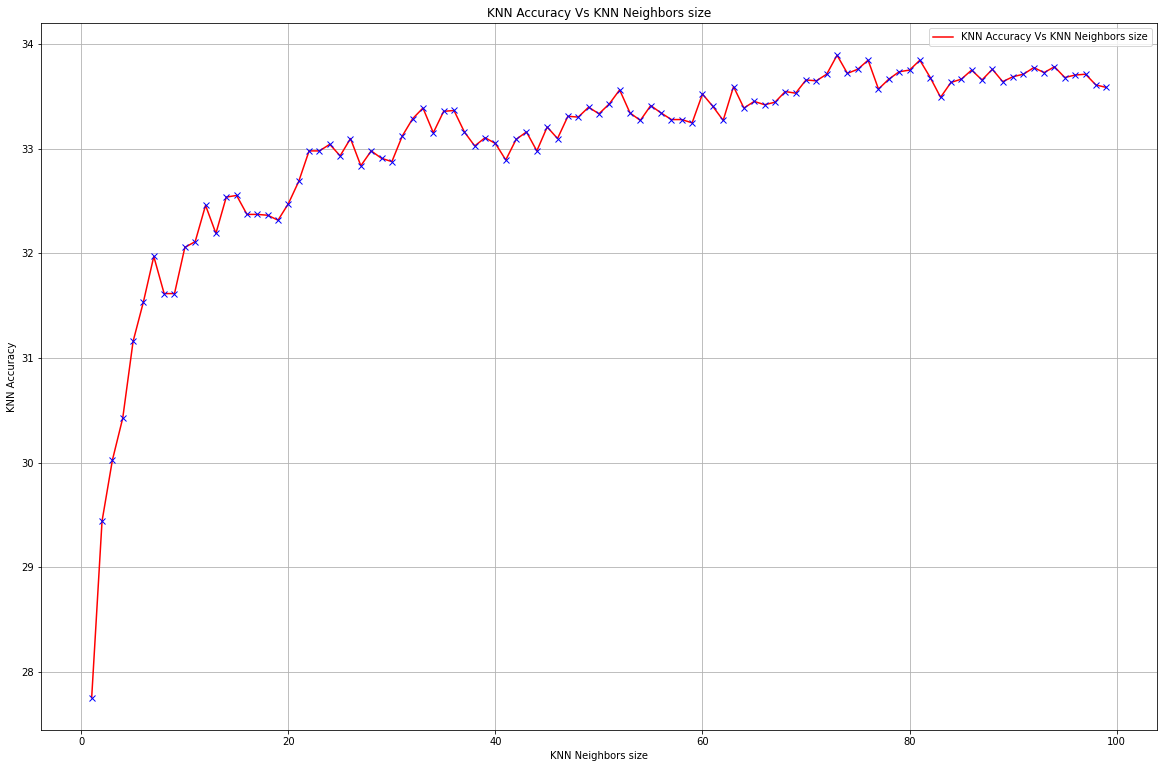

In [ ]:
plot_accuracy(k_range, accuracy, 'KNN Accuracy Vs KNN Neighbors size', 'KNN Neighbors size', 'KNN Accuracy')

In [ ]:
print('Best accuracy : ', max(accuracy))
ml_stats[neigh.__class__.__name__].iloc[ml_stats.shape[0]-1] = max(accuracy)

Best accuracy :  33.8926967619948


## D) RandomForestClassifier hyper-parametre tuning

### 1) Nombre d'arbres

In [ ]:
def get_rf_size(n_estimators):
    accuracy= []

    for n in n_estimators:
        rf_bench = RandomForestClassifier(n_estimators = n, n_jobs = -1, random_state=42)
        rf_bench.fit(X_train, y_train)
    
        train_predictions = rf_bench.predict(X_test)
        accuracy.append(accuracy_score(y_test, train_predictions))
    
    return accuracy

In [ ]:
n_estimators = range(500, 6000, 500)

accuracy = get_rf_size (n_estimators)


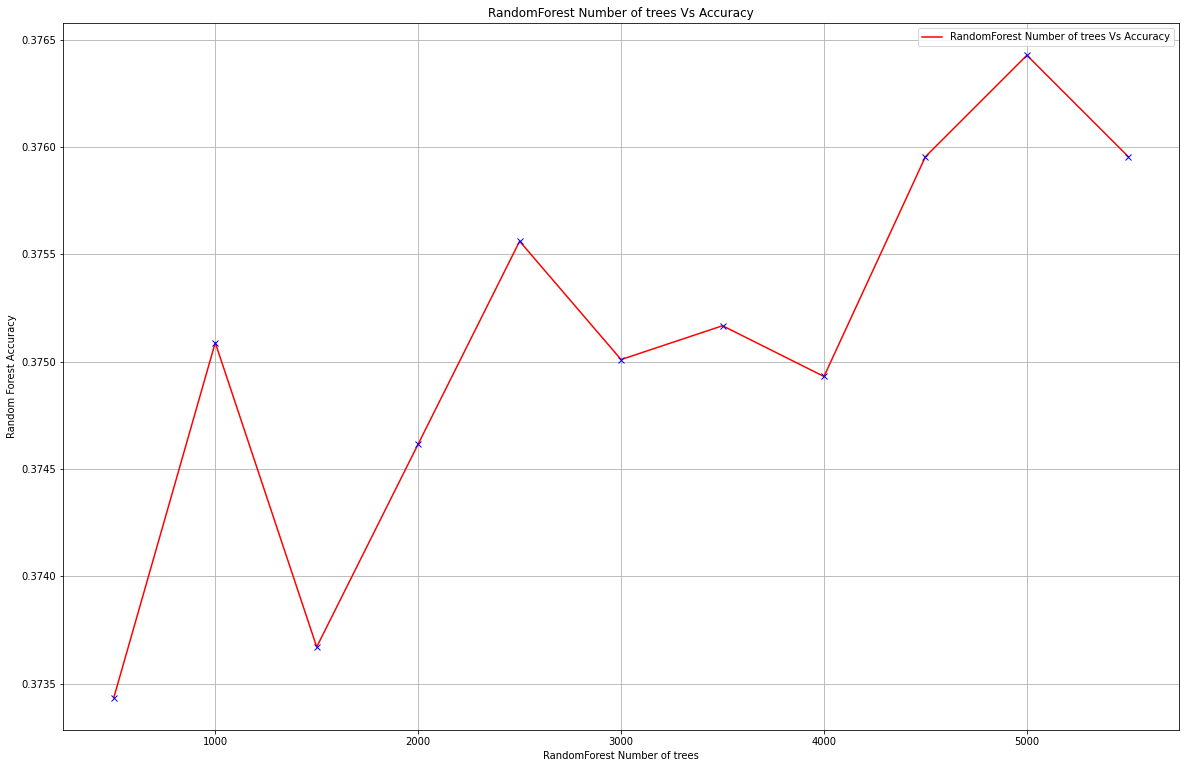

In [ ]:
plot_accuracy(n_estimators, accuracy, 'RandomForest Number of trees Vs Accuracy', 'RandomForest Number of trees', 'Random Forest Accuracy')

In [ ]:
print('Best accuracy : ', max(accuracy))

Best accuracy :  0.37642795241471677


In [ ]:
n_estimators = range(4500, 5500, 100)

accuracy = get_rf_size (n_estimators)

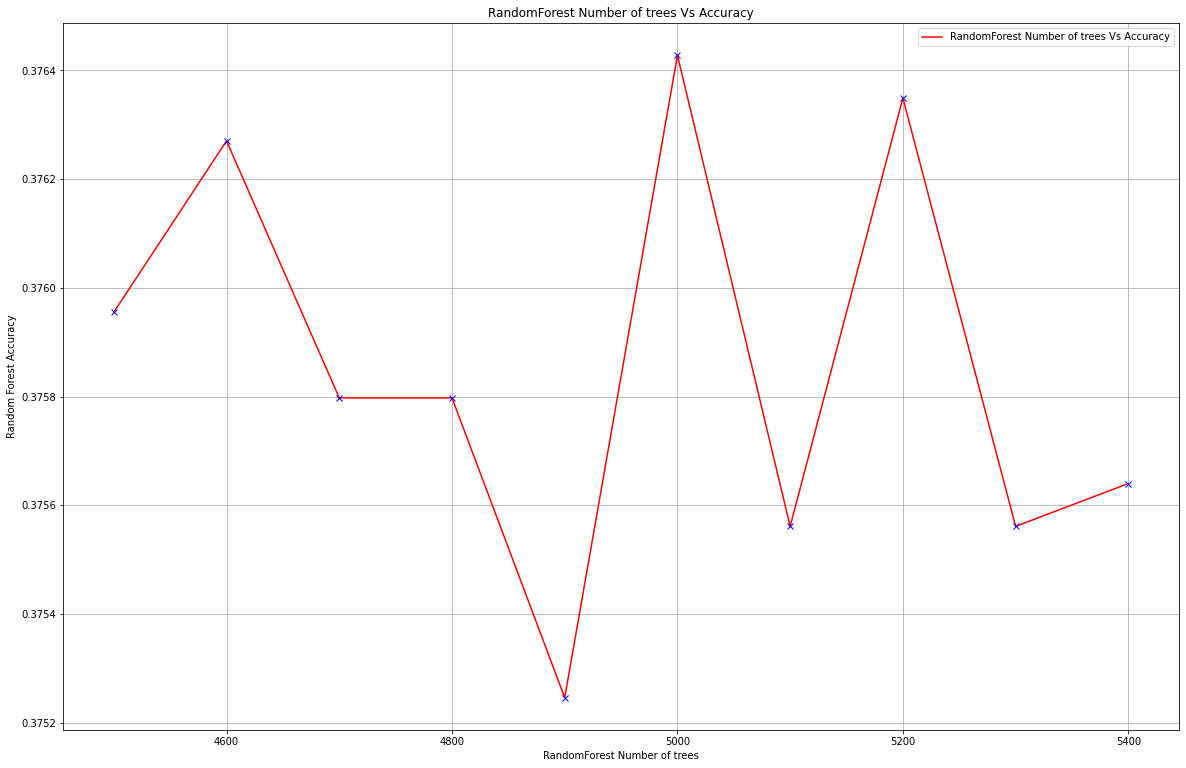

In [ ]:
plot_accuracy(n_estimators, accuracy, 'RandomForest Number of trees Vs Accuracy', 'RandomForest Number of trees', 'Random Forest Accuracy')

In [ ]:
print('Best accuracy : ', max(accuracy))

Best accuracy :  0.37642795241471677


In [ ]:
n_estimators = range(4900, 5100, 20)

accuracy = get_rf_size(n_estimators)

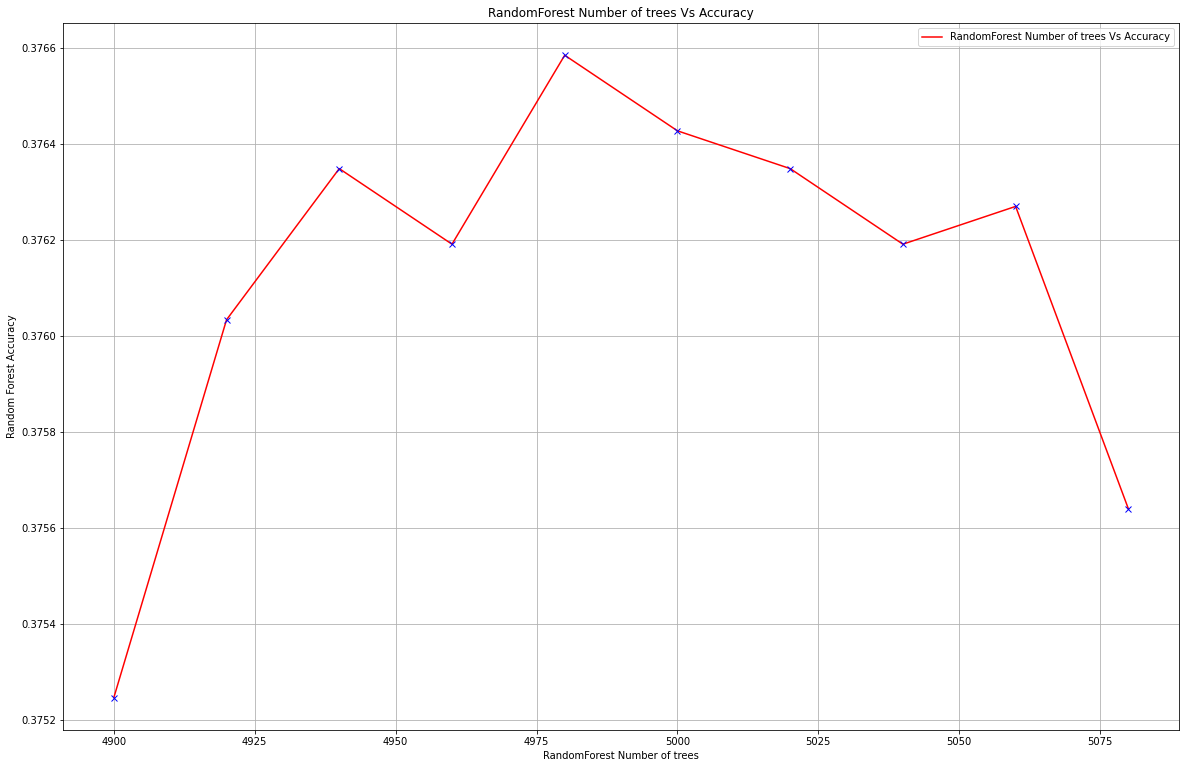

In [ ]:
plot_accuracy(n_estimators, accuracy, 'RandomForest Number of trees Vs Accuracy', 'RandomForest Number of trees', 'Random Forest Accuracy')

In [ ]:
print('Best accuracy : ', max(accuracy))

Best accuracy :  0.37658551957772


### 2) Autres paramètres

In [ ]:
accuracy= []

min_impurity_decrease = [0.01, 0.005, 0.001, 0.0005, 0.0001]
max_depth = [6, 8, 10, 12, 20, 30]
min_samples_split = range(2,10, 2)

parameters = []

for l in min_impurity_decrease:
    for d in max_depth:
            for s in min_samples_split:
                parameters.append({'min_impurity_decrease': l, 'max_depth': d, 'min_samples_split': s})
                rf_bench = RandomForestClassifier(max_depth=d,
                                                    min_impurity_decrease=l,
                                                    n_estimators = 4980,
                                                    min_samples_split = s,
                                                    random_state=42,
                                                    n_jobs = -1)

                rf_bench.fit(X_train, y_train)

                train_predictions = rf_bench.predict(X_test)
                accuracy.append(accuracy_score(y_test, train_predictions))

In [ ]:
print('Best accuracy : ', max(accuracy))

Best accuracy :  0.3751674151106909


In [ ]:
parameters[accuracy.index(max(accuracy))]

{'min_impurity_decrease': 0.0001, 'max_depth': 30, 'min_samples_split': 2}

In [ ]:
rf_opt = RandomForestClassifier(n_estimators = 4980, n_jobs = -1, random_state=42)

rf_opt.fit(X_train, y_train)

RandomForestClassifier(n_estimators=4980, n_jobs=-1, random_state=42)

In [ ]:
y_pred = rf_opt.predict(X_test)
accuracy_score(y_pred, y_test)

0.37658551957772

En modifiant les autres Hyper paramètre il semblerait que l'accuracy de notre modèle diminue, nous décidons donc de modifier uniquement la taille du randomForest

In [ ]:
acc = accuracy_score(y_pred, y_test)
ml_stats[rf_opt.__class__.__name__].iloc[ml_stats.shape[0]-1] = acc
print('Best accuracy : ', acc)

Best accuracy :  0.37658551957772


## E) XGBoost hyper-parametre tuning

In [ ]:
accuracy= []
learning_rate = [0.1, 0.01, 0.001, 0.0001]
max_depth = range(2,10,2)
min_child_weight = range(1,6,2)
colsample_bytree = np.arange(0, 1.1, 0.2)
parameters = []
i=0
for l in learning_rate:
    for d in max_depth:
        for cw in min_child_weight:
            for c in colsample_bytree:
                parameters.append({'learning_rate': l, 'max_depth': d, 'min_child_weight':  cw, 'colsample_bytree': c})
                xgb = XGBClassifier(n_estimators=50,
                         learning_rate = l,
                         max_depth = d,
                         min_child_weight = cw,
                         colsample_bytree = c,          
                         objective= "multi:softprob",
                         nthread=-1,
                         random_state=42)

                xgb.fit(X_train, y_train)

                train_predictions = xgb.predict(X_test)
                accuracy.append(accuracy_score(y_test, train_predictions))
                print(i)
                i+= 1

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:12:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0
[15:12:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
1
[15:12:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
2
[15:12:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the 

28
[15:13:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
29
[15:13:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
30
[15:13:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
31
[15:13:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used wit

57
[15:15:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
58
[15:15:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
59
[15:15:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
60
[15:15:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used wit

86
[15:17:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
87
[15:17:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
88
[15:17:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
89
[15:17:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used wit

115
[15:18:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
116
[15:18:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
117
[15:18:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
118
[15:18:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used

144
[15:20:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
145
[15:20:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
146
[15:20:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
147
[15:20:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used

173
[15:21:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
174
[15:21:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
175
[15:21:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
176
[15:21:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used

202
[15:23:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
203
[15:23:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
204
[15:23:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
205
[15:23:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used

231
[15:25:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
232
[15:25:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
233
[15:25:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
234
[15:25:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used

260
[15:26:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
261
[15:26:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
262
[15:26:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
263
[15:26:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used

In [ ]:
print('Best accuracy : ', max(accuracy))

Best accuracy :  0.37493106436618606


In [ ]:
parameters[accuracy.index(max(accuracy))]

{'learning_rate': 0.1,
 'max_depth': 8,
 'min_child_weight': 3,
 'colsample_bytree': 0.6000000000000001}

In [ ]:
xgb_opt = XGBClassifier(n_estimators=50,
                         learning_rate = 0.1,
                         max_depth = 8,
                         min_child_weight = 3,
                         colsample_bytree = 0.6,          
                         objective= "multi:softprob",
                         nthread=-1,
                         random_state=42)

xgb_opt.fit(X_train, y_train)

train_predictions = xgb_opt.predict(X_test)

[15:32:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
acc = accuracy_score(y_test, train_predictions)

ml_stats[xgb_opt.__class__.__name__].iloc[ml_stats.shape[0]-1] = acc
print('Best accuracy : ', acc)

Best accuracy :  0.37493106436618606


# 8] Résultast finaux

In [ ]:
ml_stats

,DecisionTreeClassifier,RandomForestClassifier,XGBClassifier,KNeighborsClassifier,type
0,0.285197,0.365792,0.358387,0.311589,default
1,0.362877,0.376586,0.374931,33.8927,optimisé


Nous choisirons donc le modèle random forest optimisé pour la suite du projet

# 9] API

## A) Préparation de la base de données

In [ ]:
# Création de la liste d'article
artcl_titles = data_set['url'].apply(lambda x: x.split('/')[-2]).tolist()
artcl_titles

['amazon-instant-video-browser',
 'ap-samsung-sponsored-tweets',
 'apple-40-billion-app-downloads',
 'astronaut-notre-dame-bcs',
 'att-u-verse-apps',
 'beewi-smart-toys',
 'bodymedia-armbandgets-update',
 'canon-poweshot-n',
 'car-of-the-future-infographic',
 'chuck-hagel-website',
 'cosmic-events-doomsday',
 'crayon-creatures',
 'creature-cups',
 'dad-jokes',
 'downton-abbey-tumblrs',
 'earth-size-planets-milky-way',
 'echo-game',
 'entrepreneur-trends-2013',
 'facebook-sick-app',
 'felt-audio-pulse-speaker',
 'ford-glympse',
 'ftc-google-leaks',
 'fujifilm-50x-superzoom',
 'hillary-clinton-helmet',
 'htc-q1',
 'huawei-ascend-mate',
 'iheartradio-app-perfect-for',
 'intel-awesome-laptop',
 'isp02-iphone-take-your-pulse',
 'jobs-contently',
 'land-a-job-at-spotify',
 'lego-taking-robotics-to-next-level-with-mindstorms-ev3',
 'lg-oled-tv-price',
 'lionel-messi-fashion-moments',
 'living-room-pinterest-contest',
 'livio-connect-expands',
 'magisto-ces',
 'man-instagram-images-blind',
 'm

In [ ]:
# Création de notre base de donnée de prédiction 
X_api = data_set_strd.drop(columns=['popularity', 'shares', 'url'])
Y_api = data_set_strd['popularity'].tolist()

In [ ]:
# On récupère notre modèle
model = rf_opt

## B) Mise en place de l'API

In [ ]:
from flask import Flask, jsonify, request, make_response

In [ ]:
# Démarrage d'api
app = Flask(__name__)

In [ ]:
# End-point permettant de vérifier que l'api est bien lancé
@app.route('/')
def index():
    return '<h1>API Launched</h1>'

In [ ]:
# End point permettant de récupérer la liste des articles disponibles à la prédiction
@app.route('/articles', methods=['GET'])
def get_articles():

    return jsonify({"articles": artcl_titles}), 200

In [ ]:
# End point permettant de prédire la popularité d'un ou plusieurs articles
@app.route('/popularity', methods=['POST'])
def get_popularity():

    # Récupérer la requette en json ------------------------------

    req = request.get_json()
    
    if "article" in list(req.keys()):
        if(type(req["article"]) == list):
            titles = req["article"]
        else:
            titles = [req["article"]]
    else:
        return jsonify({'success': False, 'error': "aucun article n'a été selectionné par l\'api"}), 205

    # Étape 1: Récupération des articles ------------------------------
    artcls_index = []

    for title in titles:
        artcls_index.append(artcl_titles.index(title))
    
    artcls = X_api.iloc[artcls_index]
    
    # Étape 2: Prédiction ------------------------------

    result = model.predict(artcls)
   

    return jsonify({"result": [ { "article": title, "popularity": result[index] } for index, title in enumerate(titles) ] }), 200

In [ ]:
# Démarrer l'API
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [31/Dec/2020 15:50:35] "POST /popularity HTTP/1.1" 200 -
